In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Функция для перевода точек в новый базис
def change_basis(points, old_basis, new_basis):
    # Строим матрицу перехода из старого базиса в новый
    transition_matrix = np.linalg.inv(new_basis).dot(old_basis)
    
    # Преобразуем точки в новый базис
    new_points = points.dot(transition_matrix)
    
    return new_points

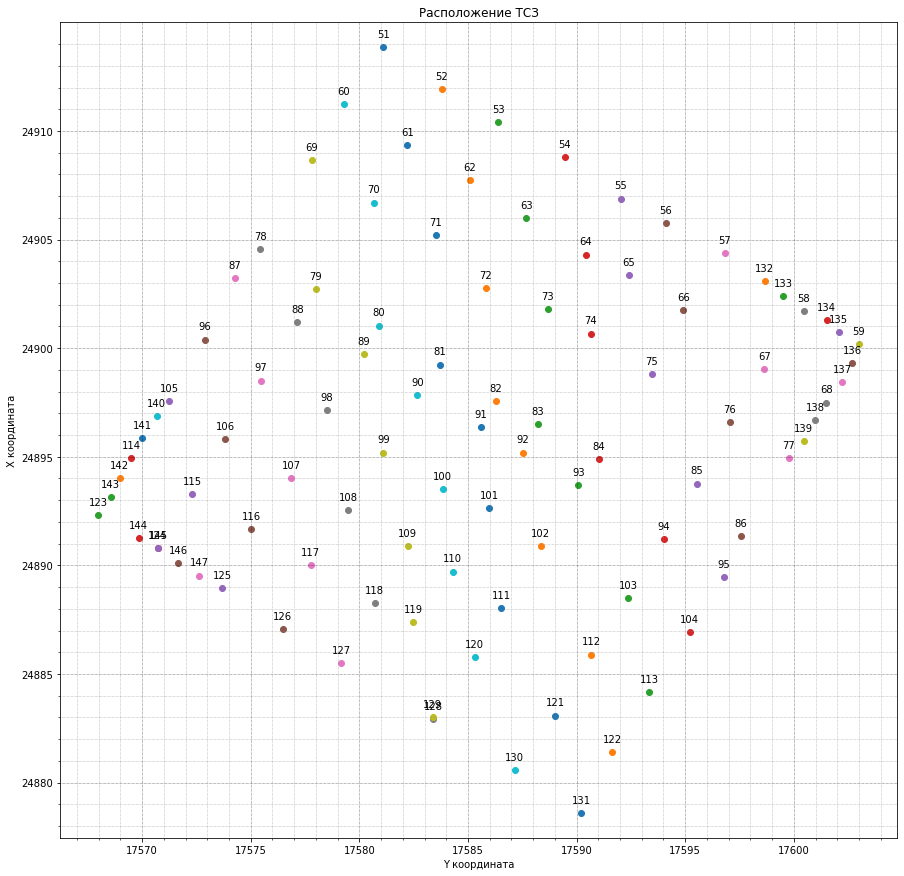

In [3]:
house_3 = pd.read_excel("data/house_3.xlsx")

y = house_3["x"]
x = house_3["y"]
labels = house_3["тсз"]

plt.figure(figsize=(15, 15))

# Располагаем точки на графике
for i in range(len(x)):
    plt.scatter(x[i], y[i], label=f'{labels[i]} ({x[i]}, {y[i]})')
# Добавляем подписи к точкам
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Расположение ТСЗ')
plt.xlabel('Y координата')
plt.ylabel('X координата')
# Сохранение пропорций X Y
plt.axis('equal')
# Добавляем основную сетку
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# Добавляем дополнительную сетку
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# Включаем дополнительные деления на осях
plt.minorticks_on()
plt.show()

In [4]:
p0 = house_3[house_3["тсз"]==60] # начальная точка
p1 = house_3[house_3["тсз"]==61] # точка направления вектора i
p2 = house_3[house_3["тсз"]==51] # точка направления вектора j

In [5]:
old_basis = (np.concatenate([p2[["x", "y"]].to_numpy(), p1[["x", "y"]].to_numpy()]) - p0[["x", "y"]].to_numpy()).T
new_basis = np.array([[1, 0], [0, 1]])
new_coordinate = change_basis(house_3[["x", "y"]].to_numpy(), old_basis, new_basis)

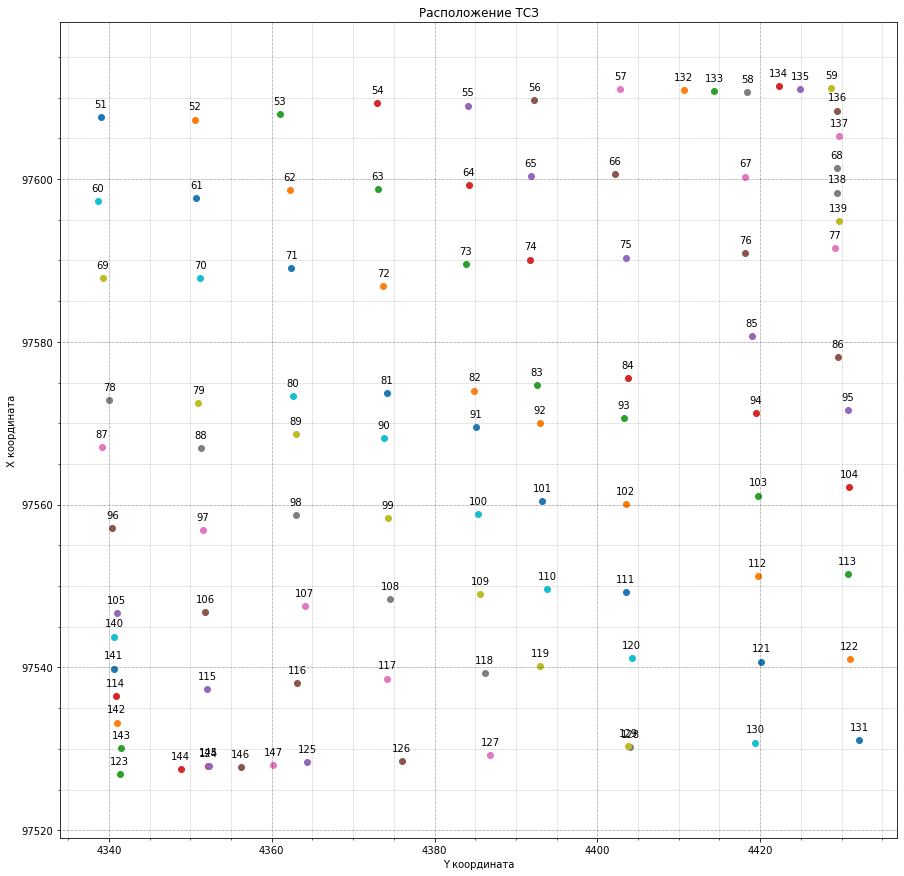

In [6]:
house_3_new = house_3.copy()
house_3_new["x"] = new_coordinate[:, 0]
house_3_new["y"] = new_coordinate[:, 1]

y = house_3_new["x"]
x = house_3_new["y"]
labels = house_3_new["тсз"]

plt.figure(figsize=(15, 15))

# Располагаем точки на графике
for i in range(len(x)):
    plt.scatter(x[i], y[i], label=f'{labels[i]} ({x[i]}, {y[i]})')
# Добавляем подписи к точкам
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Расположение ТСЗ')
plt.xlabel('Y координата')
plt.ylabel('X координата')
# Сохранение пропорций X Y
plt.axis('equal')
# Добавляем основную сетку
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# Добавляем дополнительную сетку
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# Включаем дополнительные деления на осях
plt.minorticks_on()
plt.show()

In [7]:
house_3_new.to_excel("data/house_3_local.xlsx", index=False)